<a href="https://colab.research.google.com/github/AnuragGorkar/Image_Recognition_using_AllCNN_architechture/blob/master/Image_Recognition_using_AllCNN_architechture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.utils import np_utils
import numpy as np
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [0]:
import sys
import keras
import tensorflow as tf
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))
print('TensorFlow: {}'.format(tf.__version__))

Python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Keras: 2.2.5
TensorFlow: 1.15.0


In [0]:
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

In [0]:
print(f'Training Images: {X_train.shape}')
print(f'Testing Images: {X_test.shape}')

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [0]:
# VIEWING SINGLE IMAGE
print(X_train[0].shape)

(32, 32, 3)


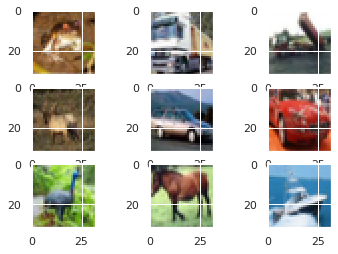

In [0]:
# CREATING A GRID OF THREE BY THREE IMAGES
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i].transpose([0,1,2])
    plt.imshow(img)
plt.show()

In [0]:
# PREPROCESSING THE DATASET

# FIXING RANDOM SEED FOR REPRODUCIBILITY
seed = 6
np.random.seed(seed)

# LOADING DATA
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

# NORMALIZING THE INPUTS FROM 0-255 TO 0-1 FOR RGB CHANNELS
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test /255.0

In [0]:
print(Y_train.shape)
print(Y_train[0])

(50000, 1)
[6]


In [0]:
# HOT ENCODING THE OUTPUTS

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_class = Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train)

10
(50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


ALL-CNN  ARCHITECHTURE
MODEL - C 
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU ----> 1
* 3 × 3 conv. 96 ReLU ----> 2
* 3 × 3 max-pooling stride 2 ----> 3
* 3 × 3 conv. 192 ReLU ----> 4
* 3 × 3 conv. 192 ReLU ----> 5
* 3 × 3 max-pooling stride 2 ----> 6
* 3 × 3 conv. 192 ReLU ----> 7
* 1 × 1 conv. 192 ReLU ----> 8
* 1 × 1 conv. 10 ReLU ----> 9
* global averaging over 6 × 6 spatial dimensions ----> 10
* 10 or 100-way softmax ----> 11

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D 
from keras.optimizers import SGD

In [0]:
def ALL_CNN():
  with tf.device('/device:GPU:0'):
      model = Sequential() # DEFINE MODEL TYPE

          # INPUT MODEL LAYER
      model.add(Conv2D(96, (3, 3), padding = "same", input_shape = (3, 32, 32))) #----> 1
      model.add(Activation('relu')) #----> 1

          # INTERMEDIATE MODEL LAYERS
      model.add(Conv2D(96, (3, 3), padding = "same")) #----> 2
      model.add(Activation('relu')) #----> 2

      model.add(Conv2D(96, (3, 3), padding = "same", strides = (2,2))) #----> 3
      model.add(Dropout(0.5))

      model.add(Conv2D(192, (3,3), padding = "same")) #----> 4
      model.add(Activation('relu')) #----> 4

      model.add(Conv2D(192, (3,3), padding = "same")) #----> 5
      model.add(Activation('relu')) #----> 5

      model.add(Conv2D(192, (3,3), padding = "same", strides = (2,2))) #----> 6
      model.add(Dropout(0.5)) #----> 6

      model.add(Conv2D(192, (3,3),padding = "same")) #----> 7
      model.add(Activation('relu')) #----> 7

      model.add(Conv2D(192, (1,1),padding = "valid")) #----> 8
      model.add(Activation('relu')) #----> 8

      model.add(Conv2D(10, (1,1),padding = "valid")) #----> 9
      model.add(Activation('relu')) #----> 9

      # ADD GLOBAL AVERAGE POOLING LAYER WITH SOFTMAX
      model.add(GlobalAveragePooling2D())
      model.add(Activation('softmax'))

      # LOAD WEIGHTS
      if weights:
        model.load_weights(weights)

      # RETURN THE MODEL
      return model

In [0]:
# HYPER-PARAMETERS TUNING
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# BUILD MODEL
model = ALL_CNN()

# DEFINE OPTIMIZER AND COMPILE THE MODEL
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# MODEL SUMMARY
print(model.summary())

# DEFINE ADDITIONAL TRAINING PARAMETERS
epochs = 350
batch_size = 32

# FIT THE MODEL

model.fit(X_train.reshape(50000, 3, 32, 32), Y_train, validation_data=(X_test.reshape(10000, 3, 32, 32), Y_test), epochs = epochs, batch_size = batch_size, verbose = 1) 